In [36]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mymath
from scipy import stats

In [4]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/Sales_add.csv"
data= pd.read_csv(file) #reading file

In [5]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [8]:
data.corr()

C:\Users\ppbin\AppData\Local\Temp\ipykernel_8332\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Sales_before_digital_add(in $),1.000000,-0.178668
Sales_After_digital_add(in $),-0.178668,1.000000


In [11]:
data.columns

Index(['Month', 'Region', 'Manager', 'Sales_before_digital_add(in $)',
       'Sales_After_digital_add(in $)'],
      dtype='object')

In [25]:
data1=data.drop('Month',axis=1)
data1
data2=data1.drop('Region', axis=1)
data2
data3=data2.drop('Manager', axis=1)
data3

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,132921,270390
1,149559,223334
2,146278,244243
3,152167,231808
4,159525,258402
5,137163,256948
6,130625,222106
7,131140,230637
8,171259,226261
9,141956,193735


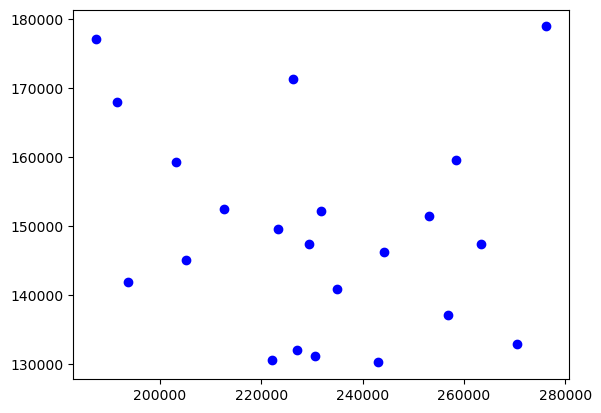

In [29]:
y= data3['Sales_before_digital_add(in $)']
X= data3.drop('Sales_before_digital_add(in $)', axis=1)
plt.scatter( X,y, color = 'blue' )

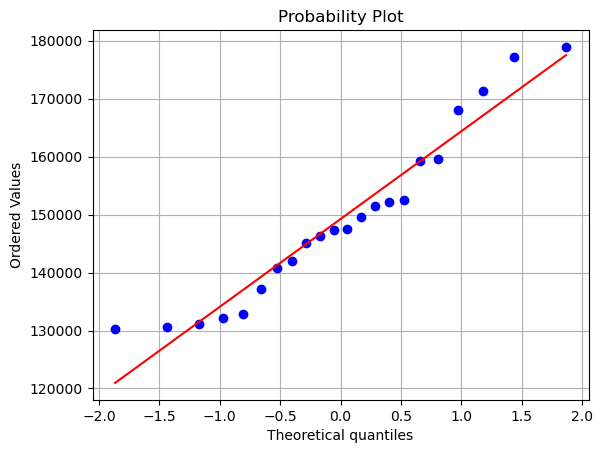

In [30]:
# Normality test
norm_test = stats.normaltest(y)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(y, plot= plt)
plt.grid()
plt.show()

In [31]:
stats.mstats.normaltest(y)

NormaltestResult(statistic=1.613300651076297, pvalue=0.44635069444018005)

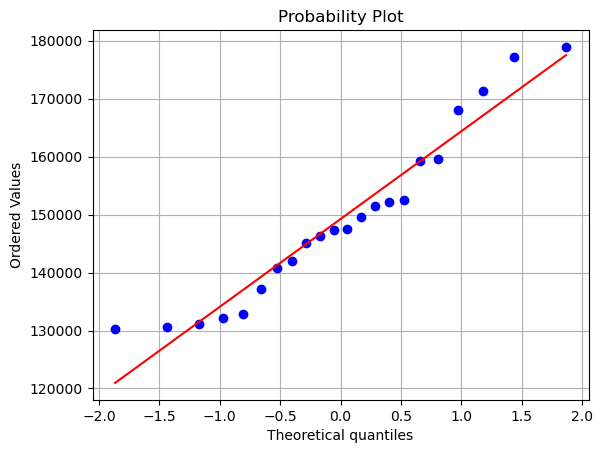

In [32]:
# Normality test
norm_test = stats.normaltest(X)
w = norm_test[0]
p_value = norm_test[1]
stats.probplot(y, plot= plt)
plt.grid()
plt.show()

In [33]:
stats.mstats.normaltest(X)
# p value > 0.05 hence data follows normal distribution

NormaltestResult(statistic=masked_array(data=[0.8008859223215488],
             mask=[False],
       fill_value=1e+20), pvalue=array([0.67002319]))

In [40]:
# t test
from scipy.stats import ttest_ind
t_stat, p_value= ttest_ind(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])

In [41]:
#print values
print('T-statistic:', t_stat)
print('P-value:', p_value)

T-statistic: -12.995084451110875
P-value: 2.614368006904645e-16


In [44]:
#any difference?
if p_value < 0.05:
    print('''There is significant difference in 
          sales before and after stepping into digital marketing.''')
else:
    print('''There is no significant difference in sales before and after stepping into digital marketing.''')

There is significant difference in 
          sales before and after stepping into digital marketing.


In [46]:
#increase or decrease in sales after stepping into digital marketing ?
print('Mean sales before digital marketing=', data['Sales_before_digital_add(in $)'].mean())
print('Mean sales after digital marketing=', data['Sales_After_digital_add(in $)'].mean())

Mean sales before digital= 149239.95454545456
Mean sales after digital= 231123.72727272726


In [47]:
# There is increase in sales  after stepping into digital marketing 


In [48]:
# region and manager are categorical data, therefore chisquare test
# use chisquare test for contingency, so create contingency table
from scipy.stats import chi2_contingency

In [49]:
pd.crosstab
cont_table= pd.crosstab(data['Region'], data['Manager'])

In [50]:
chi_stat, p_value, dof, exp= chi2_contingency(cont_table)

In [51]:
print('Chi-square statistic:', chi_stat)
print('P-value:', p_value)

Chi-square statistic: 3.050566893424036
P-value: 0.5493991051158094


In [53]:
if p_value < 0.05:
    print('Sales is not independent of Region and Managers')
else:
    print('Sales is independent of Region and Managers ')

Sales is independent of Region and Managers 
